In [1]:
import pandas as pd
import seaborn as sns

In [2]:
screen_width_pix = 1920
screen_height_pix = 1080

In [3]:
subjects_to_include = "data/subject_files.txt"
resumes_to_include = "data/resume_names.txt"

In [4]:
subjects_data = []  # contains raw eye-tracking data for each subject
times_subjects = []  # list of dataframes. each dataframe contains times spent per block per resume for each subject
times_subjects_norm = []  # list of dataframes. each dataframe contains times spent per block per resume for each subject, normalized
all_resumes = []   # resume names
subject_files = []


In [5]:
with open(subjects_to_include, 'r') as file:
    lines = file.readlines()
    for line in lines:
        subject_files.append(line.strip())
        
print(subject_files)

['data/subjects_tsv/subject-0.tsv', 'data/subjects_tsv/subject-1.tsv', 'data/subjects_tsv/subject-2.tsv', 'data/subjects_tsv/subject-3.tsv', 'data/subjects_tsv/subject-4.tsv', 'data/subjects_tsv/subject-5.tsv', 'data/subjects_tsv/subject-6.tsv', 'data/subjects_tsv/subject-7.tsv', 'data/subjects_tsv/subject-8.tsv', 'data/subjects_tsv/subject-9.tsv', 'data/subjects_tsv/subject-10.tsv', 'data/subjects_tsv/subject-11.tsv', 'data/subjects_tsv/subject-12.tsv']


In [6]:
with open(resumes_to_include, 'r') as file:
    lines = file.readlines()
    for line in lines:
        all_resumes.append(line.strip())
        
print(all_resumes)

['QUALIFIED_NOPIC_ GOODSORT_HANNAH.PNG', 'QUALIFIED_PIC_ GOODSORT_HANNAH.PNG', 'QUALIFIED_PIC_ GOODSORT_AISHA.PNG', 'QUALIFIED_NOPIC_ GOODSORT_AISHA.PNG', 'QUALIFIED_NOPIC_BADSORT_DAVID.PNG', 'QUALIFIED_PIC_BADSORT_DAVID.PNG', 'UNQUALIFIED_PIC_BADSORT_TIAN.PNG', 'UNQUALIFIED_NOPIC_BADSORT_TIAN.PNG', 'QUALIFIED_PIC_BADSORT_VIKTOR.PNG', 'QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG', 'QUALIFIED_PIC_BADSORT_RAHUL.PNG', 'QUALIFIED_NOPIC_BADSORT_RAHUL.PNG', 'QUALIFIED_PIC_GOODSORT_EMILIA.PNG', 'QUALIFIED_NOPIC_GOODSORT_EMILIA.PNG', 'UNQUALIFIED_NOPIC_GOODSORT_LEA.PNG', 'UNQUALIFIED_PIC_GOODSORT_LEA.PNG', 'UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG', 'UNQUALIFIED_PIC_ BADSORT_MARIA.PNG', 'UNQUALIFIED_PIC_ BADSORT_LEILA.PNG', 'UNQUALIFIED_NOPIC_ BADSORT_LEILA.PNG', 'UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG', 'UNQUALIFIED_PIC_GOODSORT_KARE.PNG', 'UNQUALIFIED_NOPIC_GOODSORT_HANS.PNG', 'UNQUALIFIED_PIC_GOODSORT_HANS.PNG']


In [7]:
def filter_keys(original_dict, allowed_keys):
    filtered_dict = {key: value for key, value in original_dict.items() if key in allowed_keys}
    return filtered_dict

In [8]:
# pixel coordinates for areas of interest for each resume. coordinates correspond to 1920*1080 resolution

aoi_all = {
    "QUALIFIED_PIC_GOODSORT_EMILIA.PNG": {
        "name" : [(605,39), (980,245)],
        "picture" : [(995,39), (1314,245)],
        "experience" : [(605,245), (980,1040)],
        "languages" : [(995,245), (1314,385)],
        "education" : [(995,385), (1314,610)],
        "skills" : [(995,610), (1314,770)],
        "hobbies" : [(995,870), (1314,1040)],
        "soft_skills" : [(995,770), (1314,870)]
    },
    "QUALIFIED_NOPIC_GOODSORT_EMILIA.PNG": {
        "name" : [(605,39), (980,245)],
        "picture" : [(-1,-1), (-1,-1)],
        "experience" : [(605,245), (980,1040)],
        "languages" : [(995,245), (1314,385)],
        "education" : [(995,385), (1314,610)],
        "skills" : [(995,610), (1314,770)],
        "hobbies" : [(995,870), (1314,1040)],
        "soft_skills" : [(995,770), (1314,870)]
    },
    "QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG": {
        "name" : [(605,39), (952,243)],
        "picture" : [(-1,-1), (-1,-1)],
        "experience" : [(937,405), (1314,1040)],
        "languages" : [(605,577), (937,745)],
        "soft_skills" : [(605,265), (937,402)],
        "skills" : [(605,405), (937,575)],
        "education" : [(605,745), (937,1040)],
        "hobbies" : [(937,265), (1314,402)]
    },
    "QUALIFIED_PIC_BADSORT_VIKTOR.PNG": {
        "name" : [(605,39), (952,243)],
        "picture" : [(937,39), (1314,243)],
        "experience" : [(937,405), (1314,1040)],
        "languages" : [(605,577), (937,745)],
        "soft_skills" : [(605,265), (937,402)],
        "skills" : [(605,405), (937,575)],
        "education" : [(605,745), (937,1040)],
        "hobbies" : [(937,265), (1314,402)]
    },
    "UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG": {
        "name" : [(605,39), (944,243)],
        "picture" : [(-1,-1), (-1,-1)],
        "experience" : [(605,255), (944,797)],
        "languages" : [(950,607), (1040,870)],
        "soft_skills" : [(-1,-1), (-1,-1)],
        "skills" : [(950,423), (1040,605)],
        "education" : [(950,255), (1040,420)],
        "hobbies" : [(605,805), (944,980)]
    },
    "UNQUALIFIED_PIC_GOODSORT_KARE.PNG": {
        "name" : [(605,39), (944,243)],
        "picture" : [(950,39), (1040,243)],
        "experience" : [(605,255), (944,797)],
        "languages" : [(950,607), (1040,870)],
        "soft_skills" : [(-1,-1), (-1,-1)],
        "skills" : [(950,423), (1040,605)],
        "education" : [(950,255), (1040,420)],
        "hobbies" : [(605,805), (944,980)]
    },
    "UNQUALIFIED_PIC_GOODSORT_HANS.PNG": {
        "name" : [(605,39), (959,258)],
        "picture" : [(958,39), (1314,258)],
        "experience" : [(605,405),(964,955)],
        "languages" : [(958,257),((1314,404))],
        "soft_skills" : [(958,551),(1314,712)],
        "skills" : [(958,404),(1314,547)],
        "education" : [(605,258),(961,404)],
        "hobbies" : [(958,713),(1314,900)]
    },
    "UNQUALIFIED_NOPIC_GOODSORT_HANS.PNG": {
        "name" : [(605,39), (959,258)],
        "picture" : [(-1,-1), (-1,-1)],
        "experience" : [(605,405),(964,955)],
        "languages" : [(958,257),((1314,404))],
        "soft_skills" : [(958,551),(1314,712)],
        "skills" : [(958,404),(1314,547)],
        "education" : [(605,258),(961,404)],
        "hobbies" : [(958,713),(1314,900)]
    },
    "UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG": {
        "name" : [(605,39),(954,249)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(605,254),(954,885)],
        "languages" : [(954,559),(1314,728)],
        "soft_skills" : [(-1,-1),(-1,-1)],
        "skills" : [(954,405),(1314,554)],
        "education" : [(954,249),(1314,401)],
        "hobbies" : [(954,733),(1314,885)]
    },
    "UNQUALIFIED_PIC_ BADSORT_MARIA.PNG": {
        "name" : [(605,39),(954,249)],
        "picture" : [(954,39),(1314,249)],
        "experience" : [(605,254),(954,885)],
        "languages" : [(954,559),(1314,728)],
        "soft_skills" : [(-1,-1),(-1,-1)],
        "skills" : [(954,405),(1314,554)],
        "education" : [(954,249),(1314,401)],
        "hobbies" : [(954,733),(1314,885)]
    },
    "UNQUALIFIED_NOPIC_GOODSORT_LEA.PNG": {
        "name" : [(605,39),(945,250)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(945,250),(1314,738)],
        "languages" : [(605,734),(945,910)],
        "soft_skills" : [(605,415),(945,570)],
        "skills" : [(605,574),(945,730)],
        "education" : [(945,742),(1314,990)],
        "hobbies" : [(605,255),(945,410)]
    },
    "UNQUALIFIED_PIC_GOODSORT_LEA.PNG": {
        "name" : [(605,39),(945,250)],
        "picture" : [(945,39),(1314,250)],
        "experience" : [(945,250),(1314,738)],
        "languages" : [(605,734),(945,910)],
        "soft_skills" : [(605,415),(945,570)],
        "skills" : [(605,574),(945,730)],
        "education" : [(945,742),(1314,990)],
        "hobbies" : [(605,255),(945,410)]
    },
    "UNQUALIFIED_PIC_BADSORT_TIAN.PNG": {
        "name" : [(605,39),(930,250)],
        "picture" : [(930,39),(1314,248)],
        "experience" : [(930,252),(1314,740)],
        "languages" : [(605,423),(930,650)],
        "soft_skills" : [(605,809),(930,970)],
        "skills" : [(605,654),(930,805)],
        "education" : [(605,43),(930,419)],
        "hobbies" : [(930,744),(1314,890)]
    },
    "UNQUALIFIED_NOPIC_BADSORT_TIAN.PNG": {
        "name" : [(605,39),(930,250)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(930,252),(1314,740)],
        "languages" : [(605,423),(930,650)],
        "soft_skills" : [(605,809),(930,970)],
        "skills" : [(605,654),(930,805)],
        "education" : [(605,43),(930,419)],
        "hobbies" : [(930,744),(1314,890)]
    },
    "UNQUALIFIED_PIC_ BADSORT_LEILA.PNG": {
        "name" : [(605,39),(934,248)],
        "picture" : [(938,39),(1314,248)],
        "experience" : [(938,412),(1314,984)],
        "languages" : [(938,252),(1314,408)],
        "soft_skills" : [(605,386),(934,634)],
        "skills" : [(605,638),(934,736)],
        "education" : [(605,740),(934,945)],
        "hobbies" : [(605,252),(934,382)]
    },
    "UNQUALIFIED_NOPIC_ BADSORT_LEILA.PNG": {
        "name" : [(605,39),(934,248)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(938,412),(1314,984)],
        "languages" : [(938,252),(1314,408)],
        "soft_skills" : [(605,386),(934,634)],
        "skills" : [(605,638),(934,736)],
        "education" : [(605,740),(934,945)],
        "hobbies" : [(605,252),(934,382)]
    },
    "QUALIFIED_NOPIC_ GOODSORT_HANNAH.PNG": {
        "name" : [(605,39),(995,240)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(915,245),(1314,965)],
        "languages" : [(605,499),(910,655)],
        "soft_skills" : [(605,829),(910,965)],
        "skills" : [(605,659),(910,825)],
        "education" : [(605,244),(910,495)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_PIC_ GOODSORT_HANNAH.PNG": {
        "name" : [(605,39),(995,240)],
        "picture" : [(996,39),(1314,240)],
        "experience" : [(915,245),(1314,965)],
        "languages" : [(605,499),(910,655)],
        "soft_skills" : [(605,829),(910,965)],
        "skills" : [(605,659),(910,825)],
        "education" : [(605,244),(910,495)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_PIC_ GOODSORT_AISHA.PNG": {
        "name" : [(605,39),(1015,259)],
        "picture" : [(1020,39),(1314,260)],
        "experience" : [(910,384),(1314,1040)],
        "languages" : [(605,581),(906,695)],
        "soft_skills" : [(605,264),(906,418)],
        "skills" : [(605,422),(906,577)],
        "education" : [(605,699),(906,1040)],
        "hobbies" : [(910,264),(1314,380)]
    },
    "QUALIFIED_NOPIC_ GOODSORT_AISHA.PNG": {
        "name" : [(605,39),(1015,259)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(910,384),(1314,1040)],
        "languages" : [(605,581),(906,695)],
        "soft_skills" : [(605,264),(906,418)],
        "skills" : [(605,422),(906,577)],
        "education" : [(605,699),(906,1040)],
        "hobbies" : [(910,264),(1314,380)]
    },
    "QUALIFIED_PIC_BADSORT_RAHUL.PNG": {
        "name" : [(605,39),(946,232)],
        "picture" : [(950,39),(1314,240)],
        "experience" : [(605,236),(946,895)],
        "languages" : [(950,468),(1314,653)],
        "soft_skills" : [(950,808),(1314,956)],
        "skills" : [(950,657),(1314,804)],
        "education" : [(950,244),(1314,464)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_NOPIC_BADSORT_RAHUL.PNG": {
        "name" : [(605,39),(946,232)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(605,236),(946,895)],
        "languages" : [(950,468),(1314,653)],
        "soft_skills" : [(950,808),(1314,956)],
        "skills" : [(950,657),(1314,804)],
        "education" : [(950,244),(1314,464)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_NOPIC_BADSORT_DAVID.PNG": {
        "name" : [(605,39),(930,238)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(930,242),(1314,995)],
        "languages" : [(605,863),(930,995)],
        "soft_skills" : [(605,242),(930,506)],
        "skills" : [(605,510),(930,673)],
        "education" : [(605,676),(930,860)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_PIC_BADSORT_DAVID.PNG": {
        "name" : [(605,39),(930,238)],
        "picture" : [(930,39),(1314,238)],
        "experience" : [(930,242),(1314,995)],
        "languages" : [(605,863),(930,995)],
        "soft_skills" : [(605,242),(930,506)],
        "skills" : [(605,510),(930,673)],
        "education" : [(605,676),(930,860)],
        "hobbies" : [(-1,-1),(-1,-1)]
    }
}

#aoi = filter_keys(aoi, resumes)

In [9]:
for file in subject_files:
    df = pd.read_csv(file, sep='\t')
    
    #using only required fields
    df = df[['CNT', 'TIME', 'TIME_TICK', 'FPOGX', 'FPOGY', 'FPOGS', 'FPOGD', 'FPOGID', 'FPOGV', 'USER']]
    subjects_data.append(df)


/var/folders/ps/w69mhq794zq0cpvzb8t769l80000gn/T/ipykernel_75808/4199832748.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')
/var/folders/ps/w69mhq794zq0cpvzb8t769l80000gn/T/ipykernel_75808/4199832748.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')


In [10]:
subjects_data[0].tail()

,CNT,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,USER
27585,524298,3615.46411,4241138993637,0.0,0.0,3615.21606,0.10083,9502,0,NaN
27586,524299,3615.47119,4241139063945,0.0,0.0,3615.21606,0.10083,9502,0,NaN
27587,524300,3615.47778,4241139130023,0.0,0.0,3615.21606,0.10083,9502,0,NaN
27588,524301,3615.48486,4241139199871,0.0,0.0,3615.21606,0.10083,9502,0,STOP_TRIAL
27589,524302,3615.49121,4241139264213,0.0,0.0,3615.21606,0.10083,9502,0,NaN


In [11]:
# list of resume names as displayed in the tsv file
#resumes = ['qualified_pic_goodSort_female .png', 'qualified_noPic_ goodSort_female.png', 'UNQUALIFIED_NOPIC_FEMALE_GOODORDER.PNG', 'UNQUALIFIED_PIC_MALE_GOODORDER.PNG']

In [12]:
# find indexes for splitting samples into separate dataframes for each resume
def find_displayed_resumes_and_indexes(all_resumes, df):
    disp_resumes = []
    indexes = []
    for resume in all_resumes:
        
        start_row = df[df['USER'] == resume + ' DISPLAYED']
        end_row = df[df['USER'] == resume + ' HIDDEN']
        if (len(start_row) == 0 or len(end_row)==0):
            continue
        start_index = start_row.index[0]
        end_index = end_row.index[0]
        indexes.append((start_index, end_index))
        disp_resumes.append(resume)
    return indexes, disp_resumes

In [13]:
# grouping samples into fixations:
# eliminate non valid samples by keeping only those with FPOGV == 1
# group by fixation ID
# take fpogx and fpogy values of last sample in the fixation for fixation position. do the same for fixation duration

def group_samples_into_fixations(resume_data_samples, fixations_df):
    for df in resume_data_samples:
        df = df[df['FPOGV'] == 1]
        df = df.groupby('FPOGID').agg({
        'FPOGX' : 'last',
        'FPOGY' : 'last',
        'FPOGD' : 'last'
    }).reset_index()
        fixations_df.append(df)
    

In [14]:
def normalize_times(times):
    total_time = times.get("total_time_on_resume")
    normalized_data = {}
    
    for key, value in times.items():
        #if key != "total_time_on_resume":
        #    normalized_data[key] = value / total_time
        #else:
        normalized_data[key] = value / total_time  # Keep total_time_on_resume as it is

    return normalized_data

In [15]:
def contains_picture(resume_name):
    if 'NOPIC' in resume_name:
        return False
    
    return True

In [16]:
def compute_time_for_text_and_pic_area(area_name, fixation_duration):
    if (area_name == 'picture'):
        time_pic_area += fixation_duration
    else:
        time_text_area += fixation_duration
        

In [17]:
participant_time_spent_pic_and_text = pd.DataFrame()

participant_time_spent_pic_and_text['Part_idx'] = []
participant_time_spent_pic_and_text['resume'] = []
participant_time_spent_pic_and_text['contains_pic'] = []
participant_time_spent_pic_and_text['time_text'] = []
participant_time_spent_pic_and_text['time_pic'] = []

rows = []

In [18]:
participant_idx = 0

for subject_data in subjects_data:
    
    
    # data structure to store amount of time spent fixation on each area for each resume

    times_all = {
        "QUALIFIED_PIC_GOODSORT_EMILIA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_GOODSORT_EMILIA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_BADSORT_VIKTOR.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_GOODSORT_KARE.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_GOODSORT_HANS.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_GOODSORT_HANS.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_ BADSORT_MARIA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_GOODSORT_LEA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_GOODSORT_LEA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_BADSORT_TIAN.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_BADSORT_TIAN.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_ BADSORT_LEILA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_ BADSORT_LEILA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_ GOODSORT_HANNAH.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_ GOODSORT_HANNAH.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_ GOODSORT_AISHA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_ GOODSORT_AISHA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_BADSORT_RAHUL.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_BADSORT_RAHUL.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_BADSORT_DAVID.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_BADSORT_DAVID.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        }
    }
    
    indexes, resumes = find_displayed_resumes_and_indexes(all_resumes, subject_data)
    print("length", len(indexes))
    print(indexes)
    print(resumes)
    
    aoi = filter_keys(aoi_all, resumes)
    times = filter_keys(times_all, resumes)
    
    times_normalized = times.copy()
    
    total_time_per_resume = []
    
    resume_data_fixations = []  # list of dataframes. contains fixations data for each resume.
    
    
    
    
    #splitting samples into separate dataframes for each resume
    resume_data_samples = []
    
    for i in range(len(indexes)):
        total_time = subject_data.at[indexes[i][1],"TIME"] - subject_data.at[indexes[i][0],"TIME"]
        total_time_per_resume.append(total_time)
        resume_data_samples.append(subject_data.loc[indexes[i][0] : indexes[i][1]])
        
    group_samples_into_fixations(resume_data_samples, resume_data_fixations)
    
    
    # calculation for time spent fixating on each area in each resume
    
    print('resume_data_samples', len(resume_data_samples))
    print('resume_data_fixations', len(resume_data_fixations))

    for i in range(len(resume_data_samples)):
        time_text_area = 0
        time_pic_area = 0
        
        current_resume = resumes[i]
        areas = aoi[current_resume]
        
        fixations = resume_data_fixations[i]
        for j in range(len(fixations)):
            fixation = fixations.loc[j]
            fixation_tagged = False
            
            x_pixel = fixation['FPOGX'] * screen_width_pix #1920
            y_pixel = fixation['FPOGY'] * screen_height_pix #1080
            
            fixation_duration = fixation['FPOGD']
            
            times[current_resume]['total_time_on_resume'] += fixation_duration
            times_normalized[current_resume]['total_time_on_resume'] += fixation_duration
            
            for area_name, area_coord in areas.items():
                
                area_start = area_coord[0]
                area_end = area_coord[1]
                
                if (x_pixel > area_start[0] and x_pixel < area_end[0] and
                    y_pixel > area_start[1] and y_pixel < area_end[1]):
                    
                    
                    #if text area, add fpogd to time_text else time_pic
                    #compute_time_for_text_and_pic_area(area_name, fixation_duration)
                    if (area_name == 'picture'):
                        print(area_name, fixation_duration)
                        time_pic_area += fixation_duration
                    else:
                        time_text_area += fixation_duration
                    
                    print("curr time:",  times[current_resume][area_name], "adding:", fixation_duration)
                    
                    times[current_resume][area_name] += fixation_duration
                    print("new time",  times[current_resume][area_name])
                    times_normalized[current_resume][area_name] += fixation_duration
                    fixation_tagged = True
                    break
                    
            # if not assigned to any area
            if (fixation_tagged == False):
                times[current_resume]['untagged'] += fixation_duration
                times_normalized[current_resume]['untagged'] += fixation_duration
                
        times_normalized[current_resume] = normalize_times(times_normalized[current_resume])
        
#         participant_time_spent_pic_and_text.loc[participant_idx] =
#             [participant_idx, current_resume, contains_pic(current_resume),
#              time_text_area, time_pic_area]
            
        rows.append({
            'Part_idx': participant_idx,
            'resume': current_resume,
            'contains_pic': contains_picture(current_resume),
            'time_text': time_text_area,
            'time_pic': time_pic_area
        })
        
    participant_idx += 1
    
    times_subjects.append(times)
    times_subjects_norm.append(times_normalized)


participant_time_spent_pic_and_text = pd.concat([participant_time_spent_pic_and_text, pd.DataFrame(rows)], ignore_index=True)          
            

length 12
[(7825, 9430), (13064, 15928), (16619, 18636), (21785, 22672), (4664, 7168), (1182, 4014), (10038, 12428), (19257, 21179), (27177, 27568), (23200, 23874), (24433, 25241), (25775, 26619)]
['QUALIFIED_PIC_ GOODSORT_HANNAH.PNG', 'QUALIFIED_NOPIC_ GOODSORT_AISHA.PNG', 'QUALIFIED_NOPIC_BADSORT_DAVID.PNG', 'UNQUALIFIED_PIC_BADSORT_TIAN.PNG', 'QUALIFIED_PIC_BADSORT_VIKTOR.PNG', 'QUALIFIED_PIC_BADSORT_RAHUL.PNG', 'QUALIFIED_NOPIC_GOODSORT_EMILIA.PNG', 'UNQUALIFIED_PIC_GOODSORT_LEA.PNG', 'UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG', 'UNQUALIFIED_PIC_ BADSORT_LEILA.PNG', 'UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG', 'UNQUALIFIED_NOPIC_GOODSORT_HANS.PNG']
resume_data_samples 12
resume_data_fixations 12
curr time: 0 adding: 0.42871
new time 0.42871
curr time: 0.85742 adding: 0.15405
new time 1.0114699999999999
curr time: 0 adding: 0.11377
new time 0.11377
curr time: 0.22754 adding: 0.14062
new time 0.36816
curr time: 0.50878 adding: 0.18726
new time 0.69604
curr time: 0.8833 adding: 0.12036
new time 

curr time: 0 adding: 0.22107
new time 0.22107
curr time: 0.44214 adding: 0.18762
new time 0.62976
curr time: 0.81738 adding: 0.21423
new time 1.03161
curr time: 2.11646 adding: 0.18054
new time 2.297
curr time: 0 adding: 0.27454
new time 0.27454
curr time: 0.54908 adding: 0.50916
new time 1.05824
curr time: 2.4775400000000003 adding: 0.22131
new time 2.69885
curr time: 1.5674000000000001 adding: 0.30115
new time 1.8685500000000002
curr time: 2.1697 adding: 0.45557
new time 2.62527
curr time: 2.92016 adding: 0.63635
new time 3.5565100000000003
curr time: 2.2871200000000003 adding: 0.28125
new time 2.5683700000000003
curr time: 2.8496200000000003 adding: 0.20776
new time 3.05738
curr time: 3.26514 adding: 0.14722
new time 3.41236
curr time: 3.55958 adding: 0.11401
new time 3.67359
curr time: 3.7876 adding: 0.18774
new time 3.9753399999999997
curr time: 4.16308 adding: 0.30164
new time 4.46472
curr time: 4.76636 adding: 0.21436
new time 4.98072
curr time: 5.19508 adding: 0.22778
new time 

curr time: 0 adding: 0.19434
new time 0.19434
curr time: 0.38868 adding: 0.20093
new time 0.58961
curr time: 9.281020000000002 adding: 0.10706
new time 9.388080000000002
curr time: 0 adding: 0.2478
new time 0.2478
curr time: 0 adding: 0.12048
new time 0.12048
curr time: 0.24096 adding: 0.56262
new time 0.80358
curr time: 1.3662 adding: 0.33496
new time 1.70116
curr time: 9.495140000000003 adding: 0.26794
new time 9.763080000000002
curr time: 10.031020000000002 adding: 0.12061
new time 10.15163
curr time: 10.27224 adding: 0.13391
new time 10.40615
curr time: 10.54006 adding: 0.20081
new time 10.740870000000001
curr time: 10.941680000000002 adding: 0.5293
new time 11.47098
curr time: 12.00028 adding: 0.26099
new time 12.26127
curr time: 0 adding: 0.54932
new time 0.54932
curr time: 0 adding: 0.25427
new time 0.25427
curr time: 1.09864 adding: 0.52917
new time 1.6278100000000002
curr time: 2.1569800000000003 adding: 0.32166
new time 2.4786400000000004
curr time: 2.8003000000000005 adding:

In [19]:
times_subjects[0]

{'QUALIFIED_NOPIC_GOODSORT_EMILIA.PNG': {'name': 1.31248,
  'picture': 0,
  'experience': 18.19442,
  'languages': 2.7045599999999994,
  'education': 1.3530200000000001,
  'skills': 0.8174,
  'hobbies': 0,
  'soft_skills': 1.91648,
  'untagged': 2.5703,
  'total_time_on_resume': 28.86866000000001},
 'QUALIFIED_PIC_BADSORT_VIKTOR.PNG': {'name': 1.04442,
  'picture': 1.47364,
  'experience': 10.465819999999997,
  'languages': 2.82666,
  'education': 1.01856,
  'skills': 7.018579999999999,
  'hobbies': 2.7153399999999994,
  'soft_skills': 3.8188799999999996,
  'untagged': 1.62012,
  'total_time_on_resume': 32.002019999999995},
 'UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG': {'name': 0,
  'picture': 0,
  'experience': 3.42186,
  'languages': 1.33888,
  'education': 0.1211,
  'skills': 0.58936,
  'hobbies': 0,
  'soft_skills': 0,
  'untagged': 4.579599999999999,
  'total_time_on_resume': 10.050799999999995},
 'UNQUALIFIED_NOPIC_GOODSORT_HANS.PNG': {'name': 0.56298,
  'picture': 0,
  'experience': 2

In [20]:
participant_time_spent_pic_and_text_2 = pd.DataFrame()

participant_time_spent_pic_and_text_2['Part_idx'] = []
participant_time_spent_pic_and_text_2['resume'] = []
participant_time_spent_pic_and_text_2['contains_pic'] = []
participant_time_spent_pic_and_text_2['time_text'] = []
participant_time_spent_pic_and_text_2['time_pic'] = []

rows = []

In [21]:
for i in range(len(times_subjects)):
    participant_idx = i
    for resume_name, area_times in times_subjects[i].items():
        time_pic_area = area_times['picture']
        time_text_area = area_times['total_time_on_resume'] - time_pic_area
        
        
#         for area, time in area_times.items():
#             if area == 'picture':
#                 time_pic_area += time
#             elif area == 'total_time_on_resume':
#                 continue
#             else:
#                 time_text_area += time
        rows.append({
            'Part_idx': participant_idx,
            'resume': resume_name,
            'contains_pic': contains_picture(resume_name),
            'time_text': time_text_area,
            'time_pic': time_pic_area
        })
        

participant_time_spent_pic_and_text_2 = pd.concat([participant_time_spent_pic_and_text_2, pd.DataFrame(rows)], ignore_index=True)

In [22]:
times_subjects[0]

{'QUALIFIED_NOPIC_GOODSORT_EMILIA.PNG': {'name': 1.31248,
  'picture': 0,
  'experience': 18.19442,
  'languages': 2.7045599999999994,
  'education': 1.3530200000000001,
  'skills': 0.8174,
  'hobbies': 0,
  'soft_skills': 1.91648,
  'untagged': 2.5703,
  'total_time_on_resume': 28.86866000000001},
 'QUALIFIED_PIC_BADSORT_VIKTOR.PNG': {'name': 1.04442,
  'picture': 1.47364,
  'experience': 10.465819999999997,
  'languages': 2.82666,
  'education': 1.01856,
  'skills': 7.018579999999999,
  'hobbies': 2.7153399999999994,
  'soft_skills': 3.8188799999999996,
  'untagged': 1.62012,
  'total_time_on_resume': 32.002019999999995},
 'UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG': {'name': 0,
  'picture': 0,
  'experience': 3.42186,
  'languages': 1.33888,
  'education': 0.1211,
  'skills': 0.58936,
  'hobbies': 0,
  'soft_skills': 0,
  'untagged': 4.579599999999999,
  'total_time_on_resume': 10.050799999999995},
 'UNQUALIFIED_NOPIC_GOODSORT_HANS.PNG': {'name': 0.56298,
  'picture': 0,
  'experience': 2

In [23]:
#times_subjects[1]

In [24]:
times_subjects_norm

[{'QUALIFIED_NOPIC_GOODSORT_EMILIA.PNG': {'name': 0.04546383517627765,
   'picture': 0.0,
   'experience': 0.6302481653114483,
   'languages': 0.09368498572500415,
   'education': 0.046868126196366565,
   'skills': 0.028314442028137078,
   'hobbies': 0.0,
   'soft_skills': 0.066386177952146,
   'untagged': 0.08903426761061993,
   'total_time_on_resume': 1.0},
  'QUALIFIED_PIC_BADSORT_VIKTOR.PNG': {'name': 0.03263606484840645,
   'picture': 0.04604834319833562,
   'experience': 0.3270362308379283,
   'languages': 0.08832754932344897,
   'education': 0.03182799085807709,
   'skills': 0.21931678062822285,
   'hobbies': 0.08484901890568157,
   'soft_skills': 0.11933246713801192,
   'untagged': 0.05062555426188723,
   'total_time_on_resume': 1.0},
  'UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG': {'name': 0.0,
   'picture': 0.0,
   'experience': 0.3404564810761334,
   'languages': 0.13321128666374824,
   'education': 0.012048792135949383,
   'skills': 0.05863811835873764,
   'hobbies': 0.0,
   'soft

In [25]:
participant_time_spent_pic_and_text_2

,Part_idx,resume,contains_pic,time_text,time_pic
0,0.0,QUALIFIED_NOPIC_GOODSORT_EMILIA.PNG,0.0,28.86866,0.00000
1,0.0,QUALIFIED_PIC_BADSORT_VIKTOR.PNG,1.0,30.52838,1.47364
2,0.0,UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG,0.0,10.05080,0.00000
3,0.0,UNQUALIFIED_NOPIC_GOODSORT_HANS.PNG,0.0,10.40966,0.00000
4,0.0,UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG,0.0,4.76908,0.00000
...,...,...,...,...,...
138,12.0,UNQUALIFIED_NOPIC_ BADSORT_LEILA.PNG,0.0,17.64018,0.00000
139,12.0,QUALIFIED_NOPIC_ GOODSORT_HANNAH.PNG,0.0,41.41090,0.00000
140,12.0,QUALIFIED_PIC_ GOODSORT_AISHA.PNG,1.0,26.96828,0.64282
141,12.0,QUALIFIED_NOPIC_BADSORT_RAHUL.PNG,0.0,45.93080,0.00000


In [26]:
participant_time_spent_pic_and_text_2.to_csv('output/output.csv', index=False)

In [27]:
def mean_block_times(block_times, num_of_resumes):
    mean_block_times = {}
    print(num_of_resumes)
    
    for key, value in block_times.items():
        mean_block_times[key] = value / num_of_resumes
        
    return mean_block_times

In [28]:
def processing_times(times_subjects, y_axis_label):
    block_times_resumes_with_pic = []
    block_times_resumes_without_pic = []
    
    for subject_resumes in times_subjects:
        resume_names = subject_resumes.keys()
    
        for resume_name in resume_names:
            if contains_picture(resume_name):
                block_times_resumes_with_pic.append(subject_resumes[resume_name])
            else:
                block_times_resumes_without_pic.append(subject_resumes[resume_name])
            
    block_times_with_pic = {}
    block_times_without_pic = {}

    for resume_times in block_times_resumes_with_pic:
        for key, value in resume_times.items():
            if key in block_times_with_pic:
                block_times_with_pic[key] += value
            else:
                block_times_with_pic[key] = value

    for resume in block_times_resumes_without_pic:
        for key, value in resume.items():
            if key in block_times_without_pic:
                block_times_without_pic[key] += value
            else:
                block_times_without_pic[key] = value
                
    mean_scaled_block_duration_pic = mean_block_times(block_times_with_pic, len(block_times_resumes_with_pic)) 
    mean_scaled_block_duration_nopic = mean_block_times(block_times_without_pic, len(block_times_resumes_without_pic)) 
                
    blocks = []
    relative_times = []
    pictures = []

    for key, value in mean_scaled_block_duration_pic.items():
        blocks.append(key)
        relative_times.append(value)
        pictures.append("Yes")  

    for key, value in mean_scaled_block_duration_nopic.items():
        blocks.append(key)
        relative_times.append(value)
        pictures.append("No")

    df = pd.DataFrame({
        'block': blocks,
        'time': relative_times,
        'picture': pictures
    })


    #df['picture'] = df['picture'].astype(str)
    #print(df)
    
    df = df[df['block'] != 'total_time_on_resume']
    print(df)
    
    
    sns.set_theme(style="whitegrid")

    g = sns.catplot(
        data=df, kind="bar",
        x="block", y="time", hue="picture", aspect = 2)

    g.set_axis_labels("Blocks", y_axis_label)
  


72
71
          block       time picture
0          name   1.258589     Yes
1       picture   0.696420     Yes
2    experience  14.673521     Yes
3     languages   4.236644     Yes
4     education   3.899594     Yes
5        skills   3.034544     Yes
6       hobbies   1.944095     Yes
7   soft_skills   2.361006     Yes
8      untagged   1.116885     Yes
10         name   1.329910      No
11      picture   0.000000      No
12   experience  16.552171      No
13    languages   3.742807      No
14    education   3.602624      No
15       skills   3.421121      No
16      hobbies   1.386567      No
17  soft_skills   3.084145      No
18     untagged   1.122505      No


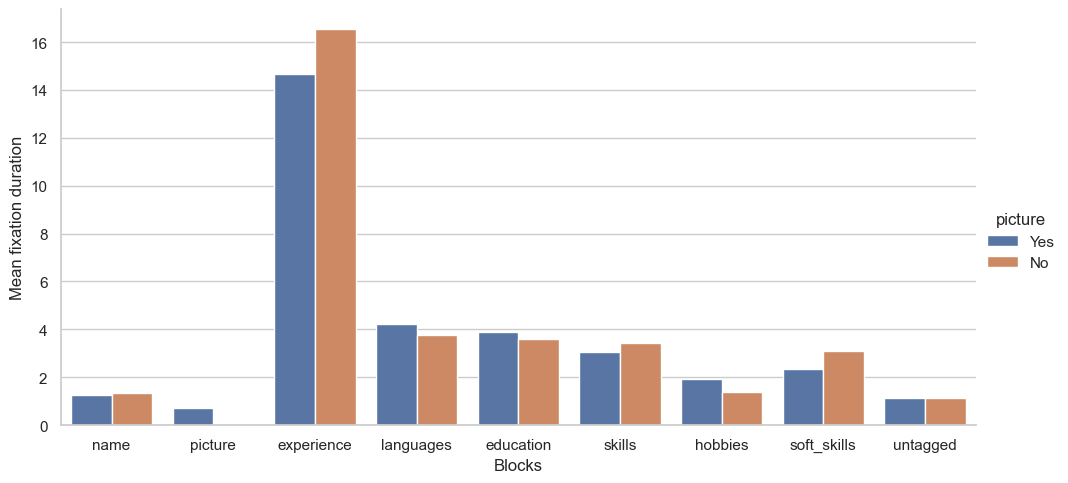

In [29]:
processing_times(times_subjects, "Mean fixation duration")

72
71
          block      time picture
0          name  0.032556     Yes
1       picture  0.025074     Yes
2    experience  0.402111     Yes
3     languages  0.139727     Yes
4     education  0.116607     Yes
5        skills  0.107778     Yes
6       hobbies  0.052875     Yes
7   soft_skills  0.074909     Yes
8      untagged  0.048363     Yes
10         name  0.042613      No
11      picture  0.000000      No
12   experience  0.430540      No
13    languages  0.141460      No
14    education  0.107799      No
15       skills  0.119438      No
16      hobbies  0.041719      No
17  soft_skills  0.070732      No
18     untagged  0.045700      No


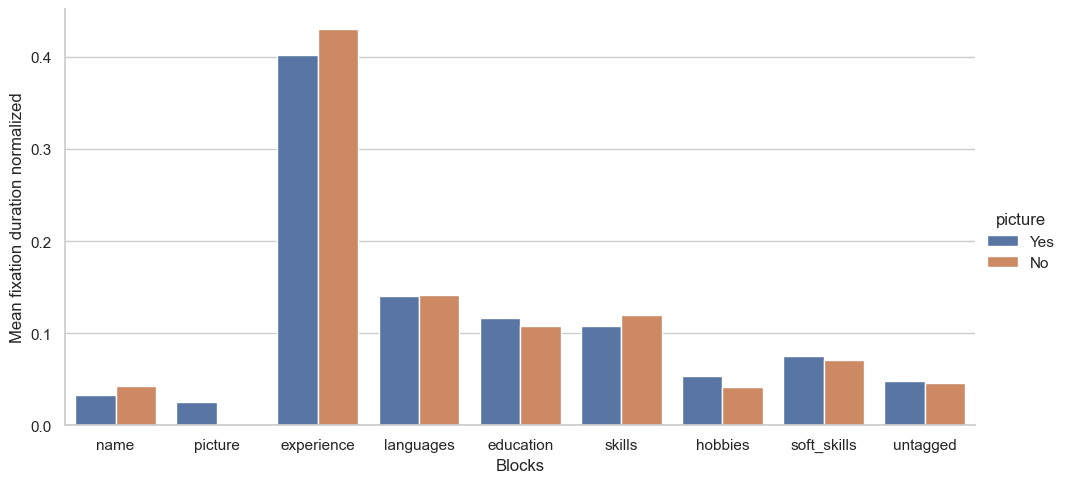

In [30]:
processing_times(times_subjects_norm, "Mean fixation duration normalized")

In [31]:
# block_times_resumes_with_pic = []
# block_times_resumes_without_pic = []

In [32]:
# for subject_resumes in times_subjects:
#     resume_names = subject_resumes.keys()
    
#     for resume_name in resume_names:
#         if contains_picture(resume_name):
#             block_times_resumes_with_pic.append(subject_resumes[resume_name])
#         else:
#             block_times_resumes_without_pic.append(subject_resumes[resume_name])


In [33]:
# block_times_resumes_with_pic

In [34]:
# block_times_resumes_without_pic

In [35]:
# block_times_with_pic = {}
# block_times_without_pic = {}

# for resume_times in block_times_resumes_with_pic:
#     for key, value in resume_times.items():
#         if key in block_times_with_pic:
#             block_times_with_pic[key] += value
#         else:
#             block_times_with_pic[key] = value
            
# for resume in block_times_resumes_without_pic:
#     for key, value in resume.items():
#         if key in block_times_without_pic:
#             block_times_without_pic[key] += value
#         else:
#             block_times_without_pic[key] = value

In [36]:
# block_times_with_pic

In [37]:
# block_times_without_pic

In [38]:
# def mean_block_times(block_times, num_of_resumes):
#     mean_block_times = {}
#     print(num_of_resumes)
    
#     for key, value in block_times.items():
#         mean_block_times[key] = value / num_of_resumes
        
#     return mean_block_times

In [39]:
# mean_scaled_block_duration_pic = mean_block_times(block_times_with_pic, len(block_times_resumes_with_pic)) 
# mean_scaled_block_duration_nopic = mean_block_times(block_times_without_pic, len(block_times_resumes_without_pic)) 

In [40]:
# blocks = []
# relative_times = []
# pictures = []

# for key, value in mean_scaled_block_duration_pic.items():
#     blocks.append(key)
#     relative_times.append(value)
#     pictures.append("Yes")  

# for key, value in mean_scaled_block_duration_nopic.items():
#     blocks.append(key)
#     relative_times.append(value)
#     pictures.append("No")

# df = pd.DataFrame({
#     'block': blocks,
#     'relative_time': relative_times,
#     'picture': pictures
# })


# #df['picture'] = df['picture'].astype(str)
# print(df)

In [41]:
# df = df[df['block'] != 'total_time_on_resume']
# print(df)

In [42]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")

# g = sns.catplot(
#     data=df, kind="bar",
#     x="block", y="relative_time", hue="picture", aspect = 2)
    
# g.set_axis_labels("Blocks", "Mean fixation duration normalized")
  